In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
#load dataset
numImgs = 34
dataPath = 'cellPics/{}.png'
data = [plt.imread(dataPath.format(i)) for i in range(numImgs)]
data = np.array(data)

#check shape
print(data.shape)

#convert to mean 0, std 1
data = (data - np.mean(data)) / np.std(data)

(34, 2048, 2048)


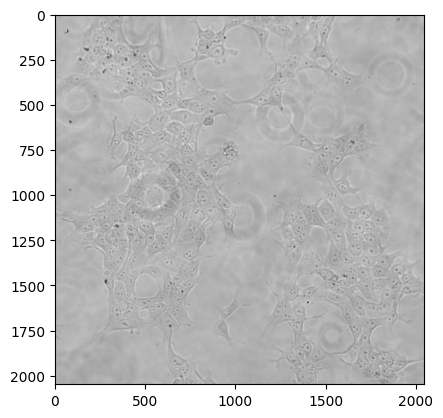

In [10]:
%matplotlib inline

#display random image from dataset
plt.imshow(data[random.randint(0, numImgs-1), :, :], cmap='gray')

In [13]:
#show matplotlib images in their own window
%matplotlib qt

global index
global annotationFile

index = 0
annotationFile = f'ann{index}.txt'
imgToShow = data[index]

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    #check if shift is pressed
    if event.dblclick:
        print(f'img{index} x = {ix}, y = {iy}')
        #append coordinates to file
        with open(annotationFile, 'a') as f:
            f.write(f'{ix},{iy}\n')

    return ix, iy

#add title and show image
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
plt.title('Image {}'.format(index))
ax.imshow(imgToShow, cmap='gray')
cid = fig.canvas.mpl_connect('button_press_event', onclick)

img10 x = 748.9284499915675, y = 869.4906763366503
